What is the relationship between the stroke population to diabetes, heart disease, and high blood pressure in respect to geographical area?
Five factors contribute to stroke.  
1.	Diabetes
2.	Heart Disease
3.	High Blood Pressure
4.	High Cholesterol
5.	Obesity


In [183]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
#import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 
import seaborn as sns 
%matplotlib inline

df1 = pd.read_csv("Daignosed_Ob_df01.csv" )
df2 = pd.read_csv("Diagnosed_Db_df01.csv" )
df3 = pd.read_csv("Diagnosed_HBp_df01.csv" )
df4 = pd.read_csv("Diagnosed_Hc_df01.csv" )
df5 = pd.read_csv("Diagnosed_Hd_df01.csv" )
df6 = pd.read_csv("Diagnosed_STr_df01.csv" )


%pip install scikit-learn  --upgrade --force
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split


  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dolly\\AppData\\Local\\r-miniconda\\envs\\datascience-pro-env\\Lib\\site-packages\\~3learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [184]:
df1.shape

(28004, 8)

In [185]:
df6 = df6.drop(columns = ['StkCity','StkLowFid', 'StkHighFid', 'StkMeanByUS', 'StkRelByUS',
       'Stk_Lat', 'Stk_Log'])
df6 = df6.rename(columns={'StkMean':'Target'})

In [186]:
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
df.head().T

,0,1,2,3,4
ObCity,Ob_AK_Anchorage,Ob_AK_Anchorage,Ob_AK_Anchorage,Ob_AK_Anchorage,Ob_AK_Anchorage
ObMean,36.3,33.5,39.0,33.4,33.2
ObLowFid,35.0,32.1,38.2,32.0,31.5
ObHighFid,37.6,34.7,39.8,34.8,34.6
ObMeanByUS,30.1,30.1,30.1,30.1,30.1
DbRelByUS,0.21,0.11,0.3,0.11,0.1
Ob_Lat,61.210286,61.159394,61.223372,61.188019,61.330877
Ob_Log,-149.875983,-149.899867,-149.723323,-149.763397,-149.574747
DbCity,Db_AK_Anchorage,Db_AK_Anchorage,Db_AK_Anchorage,Db_AK_Anchorage,Db_AK_Anchorage
DbMean,7.4,8.9,8.2,6.1,7.3


In [187]:
#df6.info
#df6.head()
#df6
#df6.columns
#df6.describe()
#df6.to_numeric(df6['StkMean'])
#df6.isna().sum()

In [188]:
#https://www.youtube.com/watch?v=wzN1UyfRSWI&t=444s
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)



In [189]:
#print("Index:  ", df.index)
#print("Columns:", df.columns)
#print("Size:   ", df.size)
#print("Shape:  ", df.shape)
#df.isna().sum()
#df.isna().sum()
#df.head().T
#df.head()
#df.info()
#df.shape 
#df.describe().T # run a quick stat 
df.columns

Index(['ObCity', 'ObMean', 'ObLowFid', 'ObHighFid', 'ObMeanByUS', 'DbRelByUS',
       'Ob_Lat', 'Ob_Log', 'DbCity', 'DbMean', 'DbLowFid', 'DbHighFid',
       'DbMeanByUS', 'DbRelByUS', 'Db_Lat', 'Db_Log', 'HBp_City', 'HBpMean',
       'HBpLowFid', 'HBpHighFid', 'HBpMeanByUS', 'HBpRelByUS', 'HBp_Lat',
       'HBp_Logit', 'Hc_City', 'HcMean', 'HcLowFid', 'HcHighFid', 'HcMeanByUS',
       'HcRelByUS', 'Hc_Lat', 'Hc_Log', 'Hd_City', 'HdMean', 'HdLowFid',
       'HdHighFid', 'HdMeanByUS', 'HdRelByUS', 'Hd_Lat', 'Hd_Log', 'Target'],
      dtype='object')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28004 entries, 0 to 28003
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ObCity       28004 non-null  object 
 1   ObMean       28004 non-null  float64
 2   ObLowFid     28004 non-null  float64
 3   ObHighFid    28004 non-null  float64
 4   ObMeanByUS   28004 non-null  float64
 5   DbRelByUS    28004 non-null  float64
 6   Ob_Lat       28004 non-null  float64
 7   Ob_Log       28004 non-null  float64
 8   DbCity       28004 non-null  object 
 9   DbMean       28004 non-null  float64
 10  DbLowFid     28004 non-null  float64
 11  DbHighFid    28004 non-null  float64
 12  DbMeanByUS   28004 non-null  float64
 13  DbRelByUS    28004 non-null  float64
 14  Db_Lat       28004 non-null  float64
 15  Db_Log       28004 non-null  float64
 16  HBp_City     28004 non-null  object 
 17  HBpMean      28004 non-null  float64
 18  HBpLowFid    28004 non-null  float64
 19  HBpH

In [191]:
# Which factor has the highest risk?
# bar-chart.
#df.describe()
#df["TOT_Risk_Factors"] = df.iloc[:, 1:5].sum(axis=1)
#df.head()

In [192]:
#After dropping all the (str) 
df = df.drop(columns = ['ObCity', 'Ob_Lat', 'Ob_Log', 'DbCity','Db_Lat', 'Db_Log', 'HBp_City', 'HBp_Lat',
'HBp_Logit', 'Hc_City','Hd_City', 'Hc_Lat', 'Hc_Log', 'Hd_City','Hd_Lat', 'Hd_Log' ])

In [193]:
df.columns

Index(['ObMean', 'ObLowFid', 'ObHighFid', 'ObMeanByUS', 'DbRelByUS', 'DbMean',
       'DbLowFid', 'DbHighFid', 'DbMeanByUS', 'DbRelByUS', 'HBpMean',
       'HBpLowFid', 'HBpHighFid', 'HBpMeanByUS', 'HBpRelByUS', 'HcMean',
       'HcLowFid', 'HcHighFid', 'HcMeanByUS', 'HcRelByUS', 'HdMean',
       'HdLowFid', 'HdHighFid', 'HdMeanByUS', 'HdRelByUS', 'Target'],
      dtype='object')

In [194]:

df01 = df.rename(columns={'ObMean':'OB','DbMean':'DB','HBpMean':'HBP','HcMean':'HC','HdMean':'HD', 
'ObMeanByUS':'OBbyUS', 'DbMeanByUS':'DBbyUS', 'HBpMeanByUS':'HBPbyUS', 'HcMeanByUS':'HCbyUS', 'HdMeanByUS':'HDbyUS',})



In [195]:
df01

,OB,ObLowFid,ObHighFid,OBbyUS,DbRelByUS,DB,DbLowFid,DbHighFid,DBbyUS,DbRelByUS,...,HcLowFid,HcHighFid,HCbyUS,HcRelByUS,HD,HdLowFid,HdHighFid,HDbyUS,HdRelByUS,Target
0,36.3,35.0,37.6,30.1,0.21,7.4,6.9,7.8,10.8,-0.31,...,31.1,33.4,34.1,-0.05,4.2,4.2,4.2,6.4,-0.34,3.5
1,33.5,32.1,34.7,30.1,0.11,8.9,8.3,9.6,10.8,-0.18,...,32.4,33.6,34.1,-0.03,4.7,4.5,5.0,6.4,-0.27,2.7
2,39.0,38.2,39.8,30.1,0.30,8.2,7.8,8.6,10.8,-0.24,...,31.3,32.4,34.1,-0.06,5.8,5.2,6.4,6.4,-0.09,2.2
3,33.4,32.0,34.8,30.1,0.11,6.1,5.4,6.8,10.8,-0.44,...,28.5,30.2,34.1,-0.14,4.4,4.1,4.8,6.4,-0.31,3.0
4,33.2,31.5,34.6,30.1,0.10,7.3,6.7,7.9,10.8,-0.32,...,30.6,32.2,34.1,-0.08,4.0,3.6,4.4,6.4,-0.38,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27999,28.9,27.6,30.3,30.1,-0.04,9.0,8.2,9.9,10.8,-0.17,...,28.6,30.1,34.1,-0.14,3.3,2.9,3.6,6.4,-0.48,2.8
28000,29.7,28.4,31.0,30.1,-0.01,7.4,6.9,7.9,10.8,-0.31,...,29.8,31.9,34.1,-0.10,4.9,4.4,5.4,6.4,-0.23,3.2
28001,28.4,26.9,29.8,30.1,-0.06,8.9,8.1,9.7,10.8,-0.18,...,31.9,33.9,34.1,-0.04,6.7,5.9,7.5,6.4,0.05,3.0
28002,27.2,26.0,28.4,30.1,-0.10,9.1,8.3,9.9,10.8,-0.16,...,30.7,32.5,34.1,-0.07,5.2,4.7,5.7,6.4,-0.19,2.3


In [196]:
df01.columns

Index(['OB', 'ObLowFid', 'ObHighFid', 'OBbyUS', 'DbRelByUS', 'DB', 'DbLowFid',
       'DbHighFid', 'DBbyUS', 'DbRelByUS', 'HBP', 'HBpLowFid', 'HBpHighFid',
       'HBPbyUS', 'HBpRelByUS', 'HC', 'HcLowFid', 'HcHighFid', 'HCbyUS',
       'HcRelByUS', 'HD', 'HdLowFid', 'HdHighFid', 'HDbyUS', 'HdRelByUS',
       'Target'],
      dtype='object')

In [197]:
print(df01["OB"].describe())
print(df01["DB"].describe())

count    28004.000000
mean        29.608920
std          9.518882
min          0.000000
25%         24.000000
50%         29.200000
75%         35.400000
max         58.600000
Name: OB, dtype: float64
count    28004.000000
mean        10.504428
std          4.575311
min          0.000000
25%          7.700000
50%          9.900000
75%         12.800000
max         39.500000
Name: DB, dtype: float64


In [ ]:
# Total number for all the factors by cities

OB_Mean = print(df01["DB"].mean())
DB_Mean = print(df01["DB"].mean())
HBP_Mean = print(df01["HBP"].mean())
HC_Mean = print(df01["HC"].mean())
HD_Mean = print(df01["HD"].mean())

OB_byUS = print(df01["OBbyUS"].mean())
DB_OB_byUS = print(df01["DBbyUS"].mean())
DB_OB_byUS = print(df01["HBPbyUS"].mean())
DB_OB_byUS = print(df01["HCbyUS"].mean())
HD_OB_byUS = print(df01["HDbyUS"].mean())

x_Risk_Factors = ['OB_Mean', 'DB_Mean','HBP_Mean', 'HC_Mean', 'HD_Mean']
y_ByUS = df01['OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'HD_OB_byUS' ]

plt.bar(x_Risk_Factors,y_ByUS, color="#444444", lable="All Factors" )

#plt.title('All Risk Factors')
#plt.xlabel("Population by the factors")
#plt.ylabel("Median measured by %")
plt.tight_layout()
plt.show()


In [ ]:
df["Target"].describe()

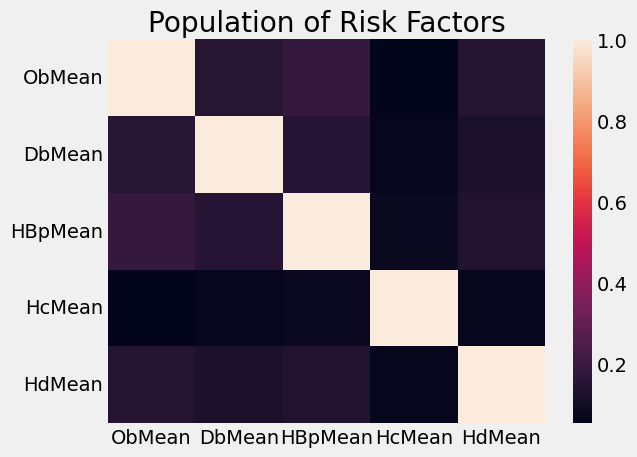

In [199]:
#Heatmap
# Summary: Distribution of all the factors from cities in the US. 
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['ObMean',  'DbMean', 'HBpMean','HcMean', 'HdMean']].corr()
sns.heatmap(df_corr)
plt.show()

In [ ]:
df.describe()

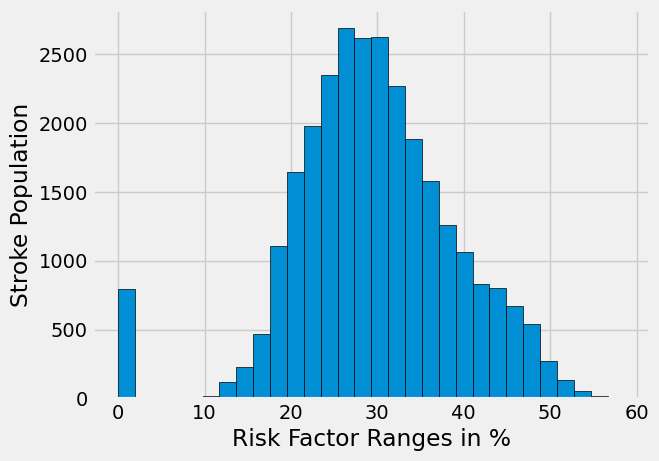

In [202]:
#plt.title('Population by cities')
plt.xlabel('Risk Factor Ranges in %')
plt.ylabel('Stroke Population')
#plt.tight_layout()
#df_Pop_ByCity = df[['ObMean', 'DbMean', 'HBpMean','HcMean', 'HdMean']]
df_Pop_ByCity = df[['ObMean']]
#bins = [20, 40, 80, 120, 160] # 12 ranges starts at 500.
plt.hist(df_Pop_ByCity, bins=30,  edgecolor='black')
plt.show()

In [ ]:
## Dividing the dataset into independent and dependent features.
X=df.iloc[:, :-1] # Independent features.
y=df.iloc[:, -1]  # dependent features.

In [ ]:
# int/float, after dropping
X

In [ ]:
# laod types of model to use.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#80% training - it chooses ramdom samples.
len(X_train)

In [ ]:
X_train

In [ ]:
#20% or what ever % specified.
len(X_test)

In [ ]:
# fit/load into a model
model = LinearRegression ()
model.fit(X_train,y_train)


In [ ]:
model.predict(X_test)

In [ ]:
y_test

In [ ]:
# Checking the accuracy 
# compare the X_test to y_test 
model.score(X_test,y_test)

In [ ]:
#model.predict(X_test)

In [ ]:

model.predict(X_test)

model.score(X_test,y_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("r2: ".format(r2_score(y_pred,y_test)))

In [ ]:
print("mae: ".format(mean_absolute_error(y_pred,y_test)))

In [ ]:
r2_score(y_pred,y_test)

In [ ]:
mean_absolute_error(y_pred,y_test)

In [ ]:
# Testing of the random test, the results will be diff each time. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model.predict(X_test)
model.score(X_test,y_test)

#model.predict(X_test)
#model.score(X_train,y_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(y_pred,y_test)